In [1]:
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import numpy as np
import pandas as pd
from matplotlib import colormaps, pyplot as plt
from pandas.api.types import CategoricalDtype
from visutils import *

# Data Prep
Read in pre-processed data \
Use categorical data types for intuitive sorting throughout

In [2]:
# read in data
cps04 = pd.read_csv('./data/acsProcessed20250312.csv')

# categorical features for intuitive sorting
a_cats = ['Under 18', '18-64', '65+']
a_type = CategoricalDtype(categories = a_cats, ordered = True)
cps04['Age Group'] = cps04['Age Group'].astype(a_type)

ad_cats = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
ad_type = CategoricalDtype(categories = ad_cats, ordered = True)
cps04['Detailed Age Group'] = cps04['Detailed Age Group'].astype(ad_type)

ms_cats = ['Never married/single', 'Married, spouse present', 'Married, spouse absent', 'Separated', 'Divorced', 'Widowed']
ms_type = CategoricalDtype(categories = ms_cats, ordered = True)
cps04['Marital Status'] = cps04['Marital Status'].astype(ms_type)

msg_cats = ['Single', 'Married', 'Separated/Divorced', 'Widowed']
msg_type = CategoricalDtype(categories = msg_cats, ordered = True)
cps04['Marital Status Group'] = cps04['Marital Status Group'].astype(msg_type)

# Understand how much people work

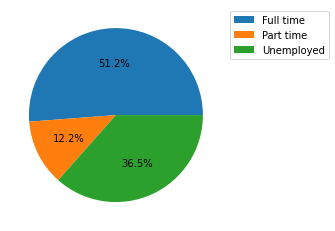

In [3]:
pie(cps04, 'Work Status')

# Understand who works full time

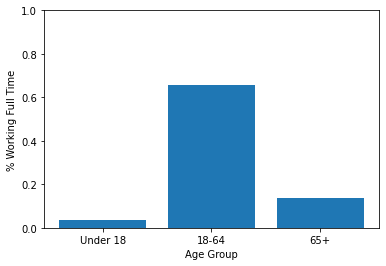

In [4]:
# create a binary full time employment flag
cps04['fte'] = 1 * (cps04['Work Status'] == 'Full time')

singleBar(cps04, 'Age Group', 'fte', ylab = '% Working Full Time', yl = (0, 1))

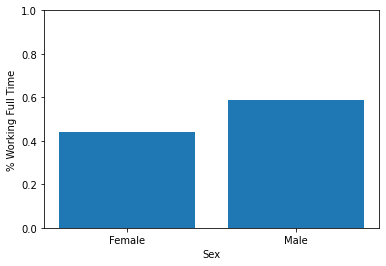

In [5]:
singleBar(cps04, 'Sex', 'fte', ylab = '% Working Full Time', yl = (0, 1))

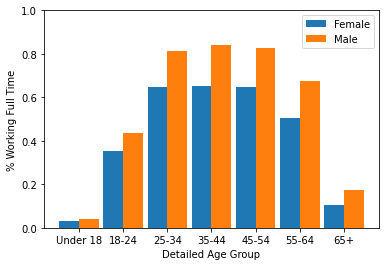

In [6]:
groupedBar(cps04, 'Detailed Age Group', 'Sex', 'fte', ylab = '% Working Full Time', yl = (0, 1))

## Focus on career age adults

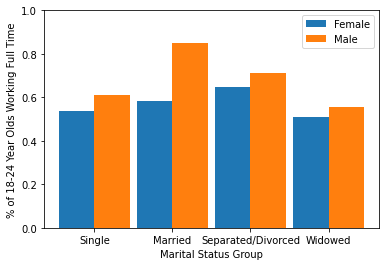

In [7]:
midage = cps04.loc[cps04['Age Group'] == '18-64'].reset_index(drop = True)

# does workforce participation vary by marital status?
groupedBar(midage, 'Marital Status Group', 'Sex', 'fte', ylab = '% of 18-24 Year Olds Working Full Time', yl = (0, 1))

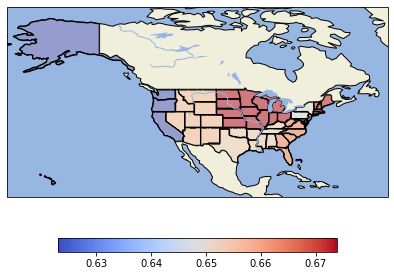

In [8]:
# does participation vary by region?

# establish average regional participation
rgnl = midage.groupby('Region')[['fte']].mean()

# map regional values back to state level
stl = midage[['State', 'Region']].drop_duplicates().merge(rgnl, how = 'outer', on = 'Region').set_index('State')
    
createStateMap(stl, 'fte', colormap = 'coolwarm')

# Understand how pay varies
## Focus on career age adults in full time employment

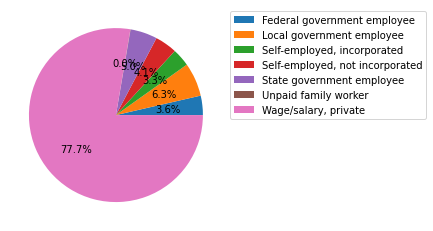

In [9]:
midage_ft = midage.loc[midage['Work Status'] == 'Full time'].reset_index(drop = True)

# understand what type of work people are doing
pie(midage_ft, 'Worker Class')

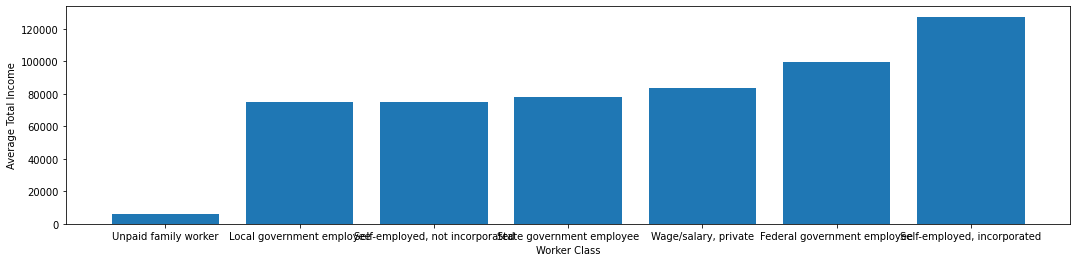

In [10]:
# understand how pay varies by sector
singleBar(midage_ft, 'Worker Class', 'Total Income'
          , ylab = 'Average Total Income', sortvalues = True, figsize = (18, 4))

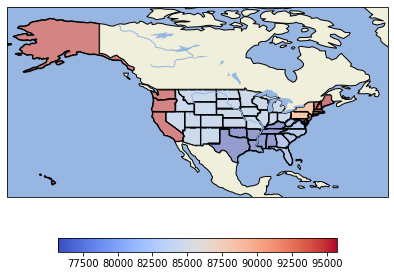

In [11]:
# and by region

# establish average regional income
rgnl = midage_ft.groupby('Region')[['Total Income']].mean()

# map regional income back to state level
stl = midage_ft[['State', 'Region']].drop_duplicates().merge(rgnl, how = 'outer', on = 'Region').set_index('State')
    
createStateMap(stl, 'Total Income', colormap = 'coolwarm')

# Explore sources of income

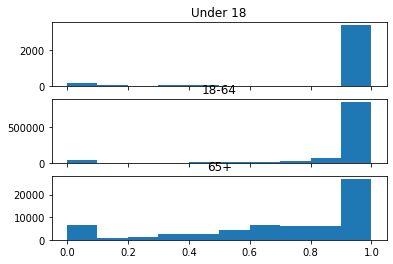

In [12]:
cps04_ft = cps04.loc[cps04['Work Status'] == 'Full time']

fig, axs = plt.subplots(nrows = 3, ncols = 1, sharex = True)

for i, s in enumerate(['Under 18', '18-64', '65+']):
    axs[i].hist(cps04_ft.loc[cps04_ft['Age Group'] == s, ['Wages as Pct of Income']], bins = 10)
    axs[i].set_title(s)

plt.show()

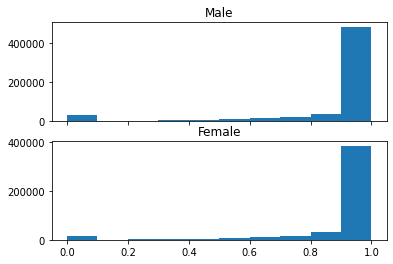

In [13]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, sharex = True)

for i, s in enumerate(['Male', 'Female']):
    axs[i].hist(cps04_ft.loc[cps04_ft['Sex'] == s, ['Wages as Pct of Income']], bins = 10)
    axs[i].set_title(s)

plt.show()